## Make an L-shaped landscape and run three parallel simulations on it, starting from predefined points.
Guess an initiall weight matrix for each order parameter. After the first round of simulations, updated the assumed weight matrix using REAP.


In [39]:
import sys
sys.path.append('toyPotential/LPotential/RL/')
import RLSim as rl
import numpy as np 

X_0 = [1.1, 1.1, 1.1]
Y_0 = [0.01,0.01,.01]

N = len(X_0) # number of parallel runs 

# run first round of simulation
my_sim = rl.mockSimulation()
W_0 = [[1/4, 1/4], [1/4, 1/4]] # initial geuss of weights for + - in x and y directions
Ws = [] # series of weights


# first round
trj1 = my_sim.run_noPlt([X_0, Y_0], nstepmax = 20)
trj1 = my_sim.PreAll(trj1)

trjs = trj1
trj1_Sp = my_sim.PreSamp(trj1, starting_n = N, myn_clusters = 20) # pre analysis
trj1_Sp_theta = my_sim.map(trj1_Sp)
newPoints = my_sim.findStarting(trj1_Sp_theta, trj1_Sp, W_0, starting_n = N , method = 'RL')

trjs_theta = trj1_Sp_theta
trjs_Sp_theta = trj1_Sp_theta

trj_Sp<starting_n
2 3


# Repeat running simulation rounds and finding the best starting structures using REAP for 700 rounds.

In [40]:
for round in range(500):
    # updates the std and mean 
    my_sim.updateStat(trjs_theta) # based on all trajectories
    W_1 = my_sim.updateW(trjs_Sp_theta, W_0) # important
    W_0 = W_1
    Ws.append(W_0)
    trj1 = my_sim.run_noPlt(newPoints, nstepmax = 10)
    trj1 = my_sim.PreAll(trj1) # Preprocess the simulation data beforehand
    com_trjs = []
    for theta in range(len(trj1)):
        com_trjs.append(np.concatenate((trjs[theta], trj1[theta])))
        
    trjs = np.array(com_trjs)
    trjs_theta = np.array(my_sim.map(trjs))
    trjs_Sp = my_sim.PreSamp(trjs, starting_n = N)
    trjs_Sp_theta = np.array(my_sim.map(trjs_Sp))
    newPoints = my_sim.findStarting(trjs_Sp_theta, trjs_Sp, W_1, starting_n = N , method = 'RL')

trj_Sp<starting_n
2 3
trj_Sp<starting_n
2 3
trj_Sp<starting_n
2 3
trj_Sp<starting_n
2 3
trj_Sp<starting_n
2 3


## Plot the data on the landscape.

/Users/ZahraSh/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/ZahraSh/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


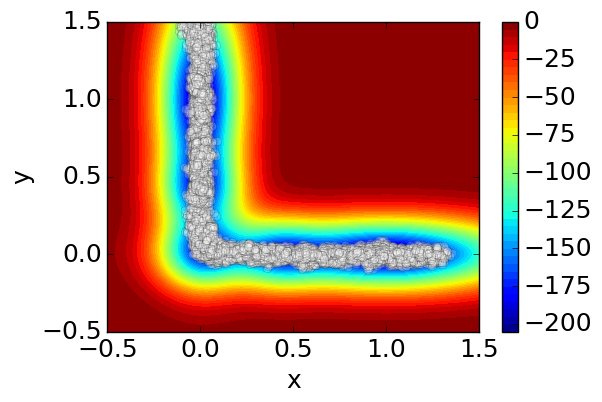

In [41]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size':18})
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)


x = np.array(trjs_theta[0])
y = np.array(trjs_theta[1])

# parameters used in the Mueller potential
aa = [-2, -20, -20, -20, -20] # inverse radius in x
bb = [0, 0, 0, 0, 0] # radius in xy
cc = [-20, -20, -2, -20, -20] # inverse radius in y
AA = 3*[-200, -120, -200, -80, -80] # strength

XX = [1, 0, 0, 0, 0.4] # center_x
YY = [0, 0, 1, 0.4, 0] # center_y

zxx = np.mgrid[-1:2.51:0.01]
zyy = np.mgrid[-1:2.51:0.01]
xx, yy = np.meshgrid(zxx, zyy)


V1 = AA[0]*np.exp(aa[0] * np.square(xx-XX[0]) + bb[0] * (xx-XX[0]) * (yy-YY[0]) +cc[0]*np.square(yy-YY[0]))
for j in range(1,5):
        V1 =  V1 + AA[j]*np.exp(aa[j]*np.square(xx-XX[j]) + bb[j]*(xx-XX[j])*(yy-YY[j]) + cc[j]*np.square(yy-YY[j]))

fig = plt.figure()
ax = fig.add_subplot(111)
cs = ax.contourf(xx,yy,np.minimum(V1,200), 40)

plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-0.5, 1.5])
plt.ylim([-0.5, 1.5])
plt.colorbar(cs)
plt.plot(x, y, 'o', color='white', alpha=0.2, mec="black")
plt.show()

## Plot weights

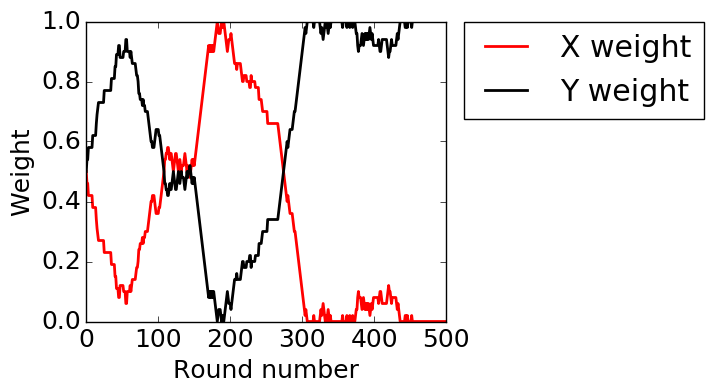

In [42]:
w = np.array(Ws)
y = w[:,1,0] + w[:,1,1]
x = w[:,0,0] + w[:,0,1]

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.6, 0.75])

ax.plot(np.arange(len(w[:,0,0])), x, 'r', lw=2, label='X weight')
ax.plot(np.arange(len(w[:,0,1])), y, 'black', lw=2, label='Y weight')
ax.set_ylim([0, 1])
ax.set_xlabel('Round number')
ax.set_ylabel('Weight')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()